In [ ]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
from IPython import display

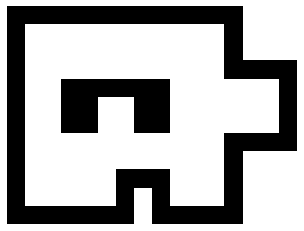

In [ ]:
from re import X

mapa = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
        [1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
        [1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
        [1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
        [1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1],
        [1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1],
        [1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1],
        [1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
        [1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
        [1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0],
        [1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0],
        [1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0]])

x = 14
y = 17

plt.imshow(mapa,cmap="binary")
plt.axis(False)
plt.show()

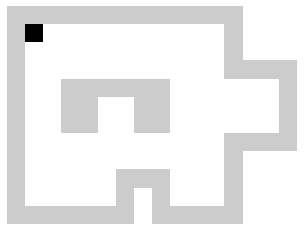

In [ ]:
mapa1 = np.array(mapa)
mapa2 = np.array(mapa)

# Determino la posicion del agente
inix = 1
iniy = 1


mapa1[inix,iniy] = 5

# Grafico la inclusion del objeto
plt.imshow(mapa1,cmap="binary")
plt.axis(False)
plt.show()

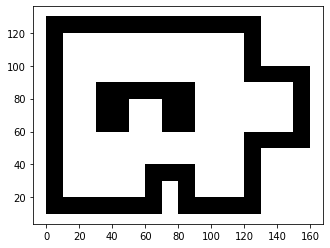

In [ ]:
def recorrido(mapa):
    plt.axes()
    for i in range(12):
        for j in range(16):
          if (mapa[i,j] == 1):
            rectangle = plt.Rectangle((j*10,120-i*10), 10, 10, fc='black')
            plt.gca().add_patch(rectangle)
          if (mapa[i,j] == 4):
            rectangle = plt.Rectangle((j*10,120-i*10), 10, 10, fc='red',ec="orange")
            plt.gca().add_patch(rectangle)
          if (mapa[i,j] == 5):
            rectangle = plt.Rectangle((j*10,120-i*10), 10, 10, fc='red')
            plt.gca().add_patch(rectangle)

    plt.axis('scaled')
    plt.show()
recorrido(mapa)

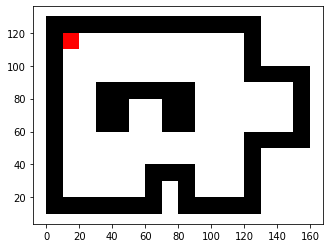

In [ ]:
mapa1[inix,iniy] = 5

recorrido(mapa1)

In [ ]:
#Umbral

def Umbral(val1,val2):
  x = np.append(val1,val2)
  w = np.array([1,1,-2,-2])
  t = 0.5 #Umbral
  return(sum(x*w) > t)

In [ ]:
def movimiento_agente(mapa1,mapa,inix,iniy):
  valx = inix
  valy = iniy
  camino = False
  term = False

  #Declaramos direcciones
  dir1 = mapa[valx][valy-1]
  dir2 = mapa[valx-1][valy-1]
  dir3 = mapa[valx-1][valy]
  dir4 = mapa[valx][valy+1]
  dir5 = mapa[valx-1][valy+1]
  dir6 = mapa[valx+1][valy-1]
  dir7 = mapa[valx+1][valy+1]
  dir8 = mapa[valx+1][valy]

  if((dir1 and dir2 and dir3) or (dir4 and dir5 and dir3) or(dir1 and dir6 and dir8) or (dir4 and dir7 and dir8) and not camino):

    while(not term):

       if((dir1 and dir2 and dir3) or (dir4 and dir5 and dir3) or(dir1 and dir6 and dir8) or (dir4 and dir7 and dir8) and  camino):
         mapa1[valx,valy] = 5
         recorrido(mapa1)
         term =True
       else:
         camino = True
         val1 = np.array(dir3,dir2)
         val2 = np.array(dir1,dir6)
         val3 = np.array(dir8,dir7)
         val4 = np.array(dir4,dir5)
         if(Umbral(val1,val2)): #Oeste
            valx = valx-1
            mapa1[valx][valy] = 4
            recorrido(mapa1)
         elif(Umbral(val2,val3)): #Sur
             valx = valx+1
             mapa1[valx][valy] = 4
             recorrido(mapa1)
         elif(Umbral(val3,val4)): #Este
              valy = valy+1
              mapa1[valx][valy] = 4
         elif(Umbral(val4,val1)): #Norte
              valx = valx-1
              mapa1[valx][valy] = 4
              recorrido(mapa1)
         else: #Norte
              valx = valx-1
              mapa1[valx][valy] = 4
              recorrido(mapa1)
  else:

    while(not term):
      if((dir1 and dir2 and dir3) or (dir4 and dir5 and dir3) or(dir1 and dir6 and dir8) or (dir4 and dir7 and dir8)):
        mapa1[valx,valy] = 5
        recorrido(mapa1)
      else:
         camino = True
         x1 = np.array(mapa[valx-1][valy]) #Norte
         x2 = np.array(mapa[valx][valx+1]) #Este
         x3 = np.array(mapa[valx+1][valy]) #Sur
         x4 = np.array(mapa[valx][valy-1]) #Oeste
         if(Umbral(x1,x2)): #Este
          valy = valy+1
          mapa1[valx][valy] = 4
          recorrido(mapa1)
         elif(Umbral(x2,x3)): #Sur
            valx = valx+1
            mapa1[valx][valy] = 4
            recorrido(mapa1)
         elif(Umbral(x3,x4)): #Oeste
            valy = valy-1
            mapa1[valx][valy] = 4
            recorrido(mapa1)
         elif(Umbral(x4,x1)): #Norte
            valx = valx-1
            mapa1[valx][valy] = 4
            recorrido(mapa1)
         else: #Norte
          valx = valx-1
          mapa1[valx][valy] = 4
          recorrido(mapa1)





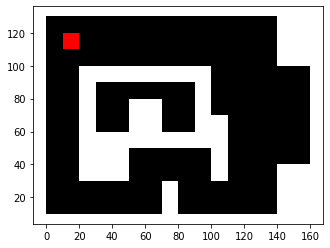

In [ ]:

movimiento_agente(mapa, mapa1,inix, iniy)


In [ ]:
# Genero una funcion para determinar el mejor estado

def verificar_evitar(x1,x2):
    x = np.append(x1,x2) #Entradas (Señales)
    w = np.array([1,-2]) #Pesos
    t = 0.5 #Umbral
    return(sum(x*w) > t) # Devuelve 1 o 0

In [ ]:
def evita_obstaculos(mapa, mapa1, inix, iniy):
    #Coordenadas de inicio
    posx = inix
    posy = iniy
    #Determino las coordenadas del objetivo
    objx = 0
    objy = 0

    while(True):

        recorrido(mapa1)
        mapa[posx][posy] = 1
        x1 = np.array(mapa[posx-1][posy]) #Norte
        x2 = np.array(mapa[posx][posy+1]) #Este
        x3 = np.array(mapa[posx+1][posy]) #Sur
        x4 = np.array(mapa[posx][posy-1]) #Oeste

        #Verificar
        if(verificar_evitar(x1,x2)): #Este
            posy = posy+1
        elif(verificar_evitar(x2,x3)): #Sur
            posx = posx+1
        elif(verificar_evitar(x3,x4)): #Oeste
            posy = posy-1
        elif(verificar_evitar(x4,x1)): #Norte
            posx = posx-1
        else: #Norte
            posx = posx-1
        mapa1[posx][posy] = 4

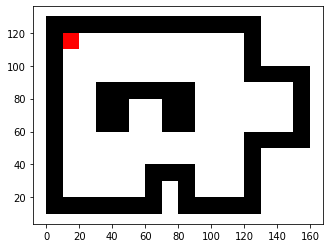

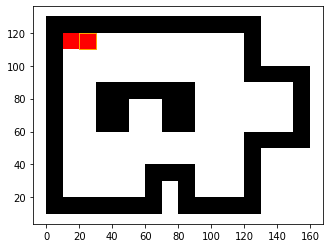

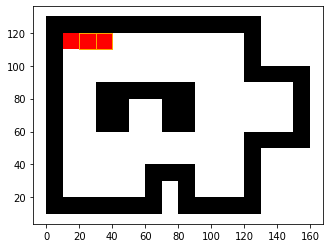

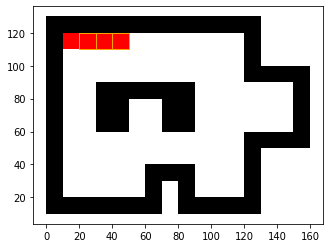

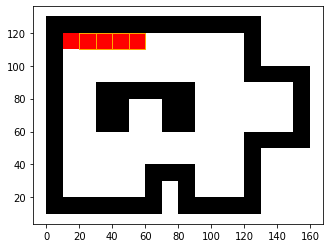

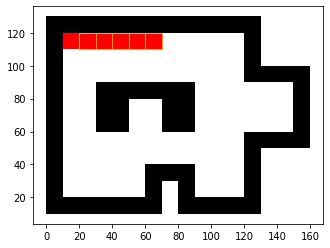

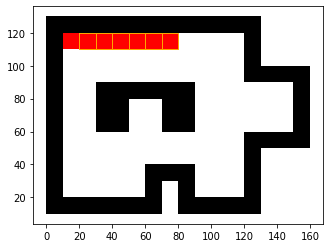

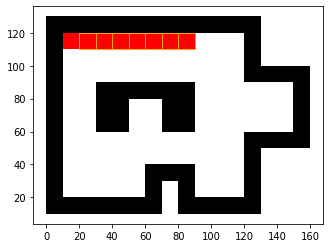

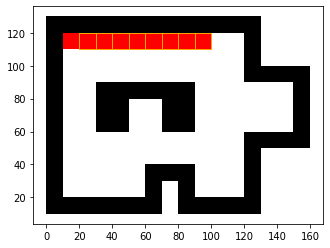

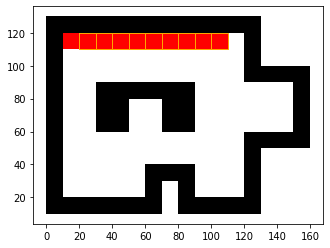

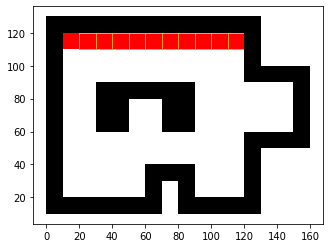

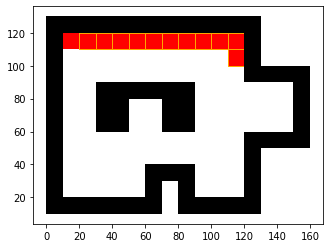

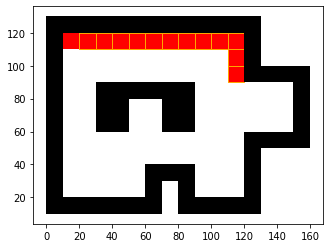

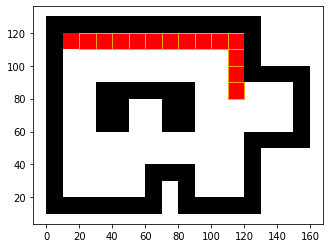

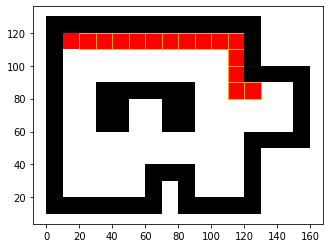

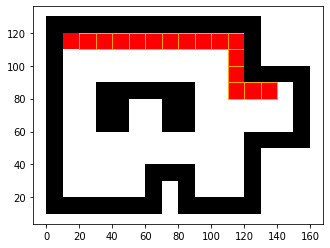

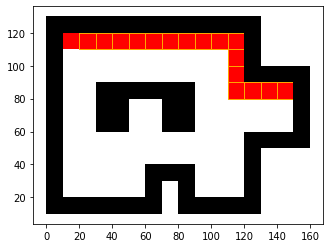

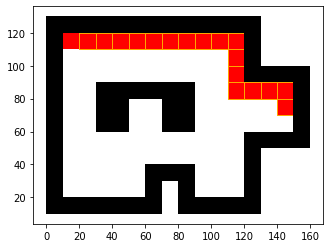

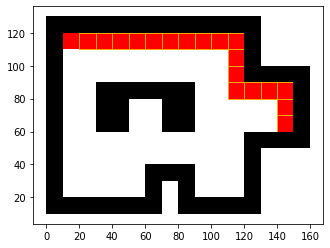

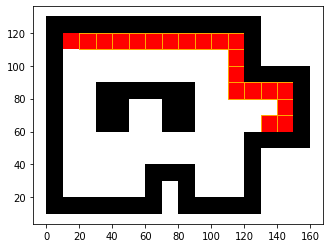

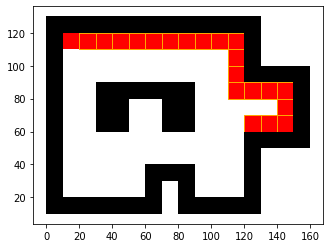

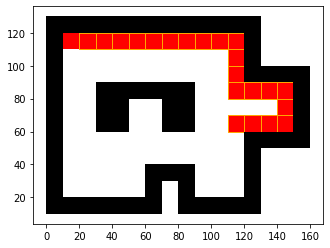

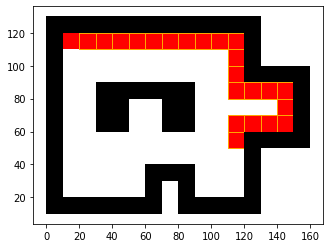

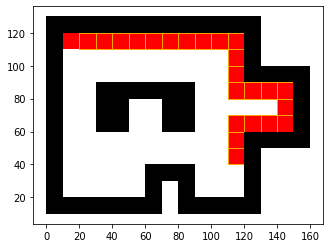

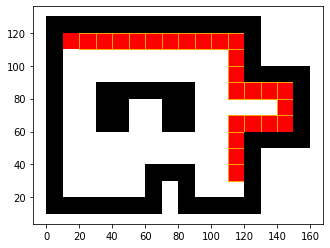

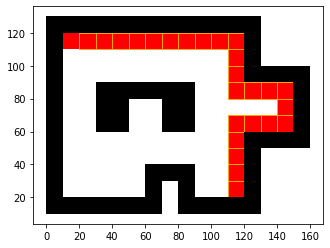

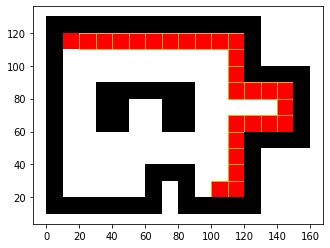

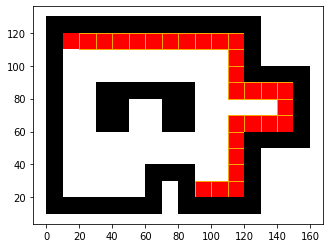

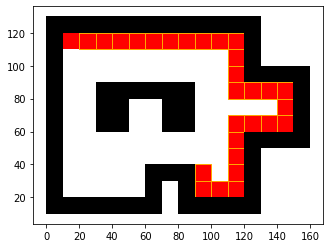

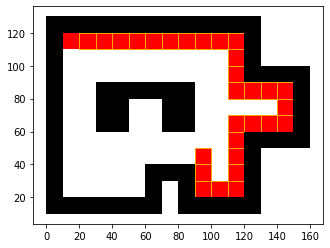

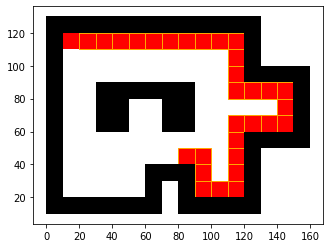

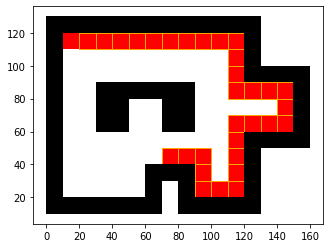

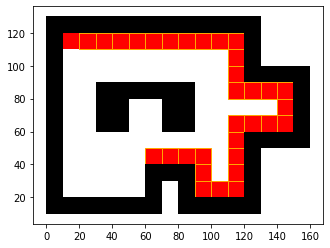

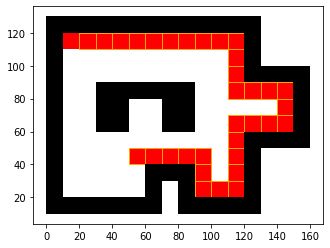

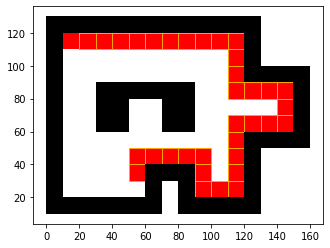

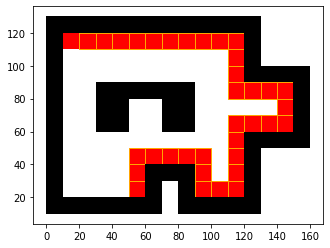

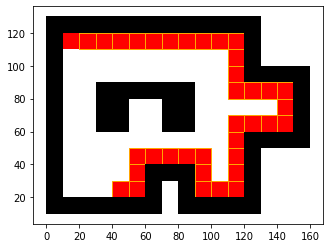

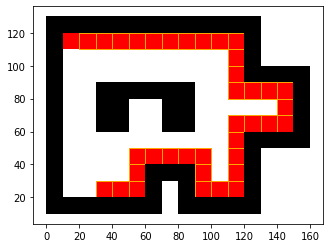

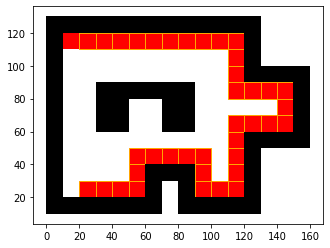

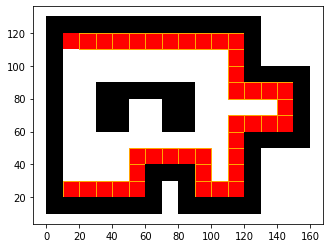

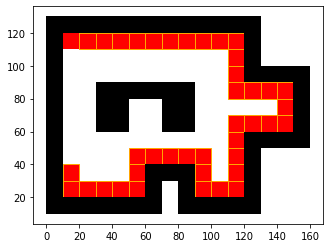

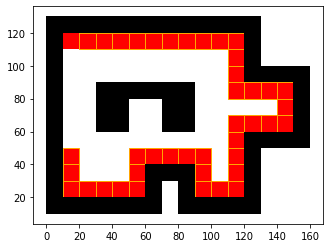

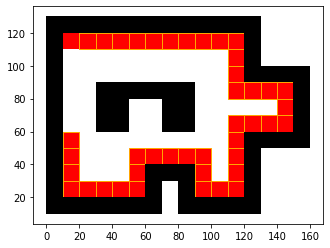

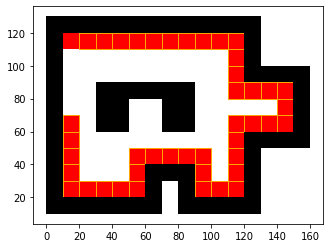

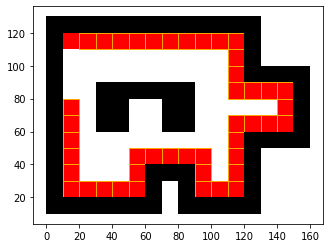

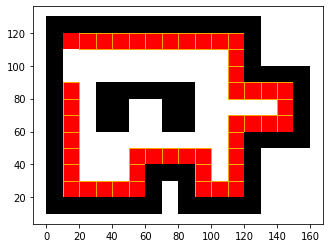

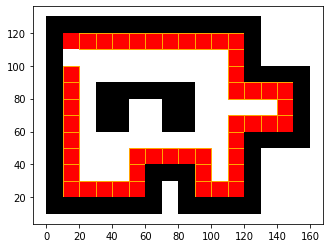

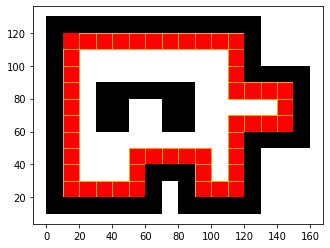

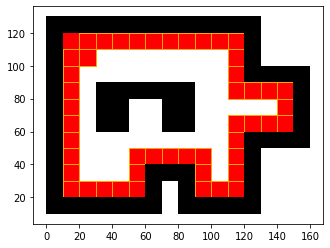

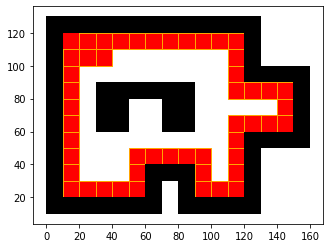

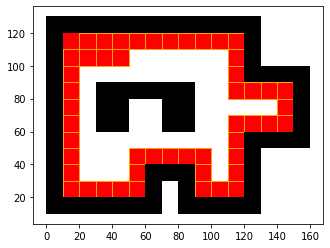

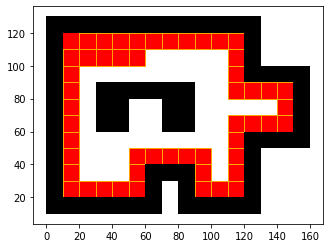

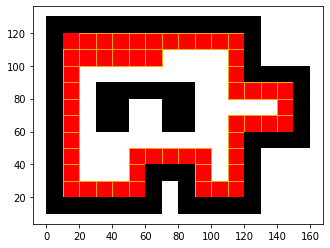

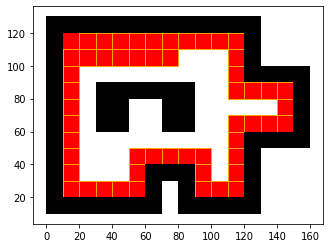

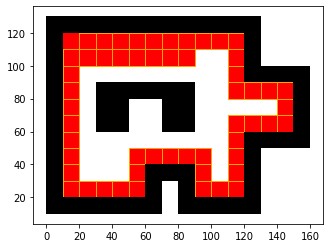

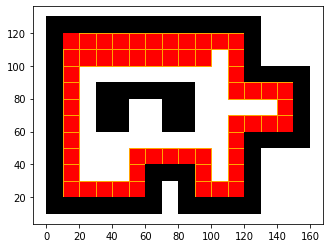

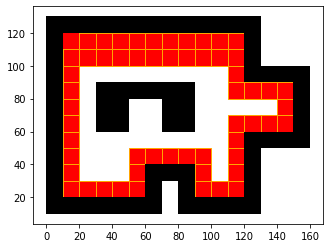

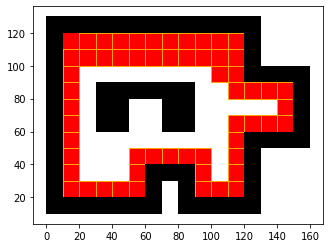

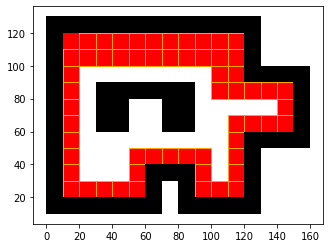

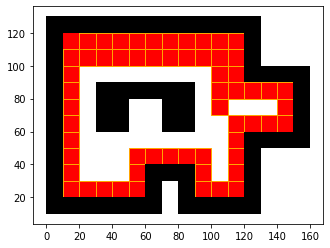

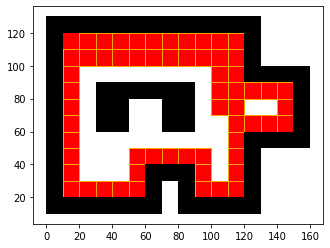

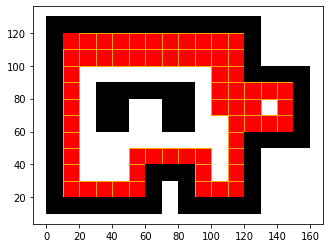

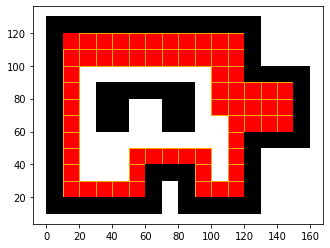

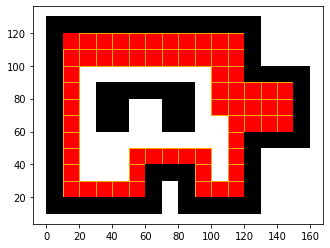

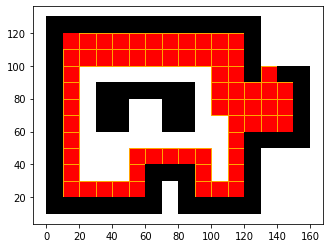

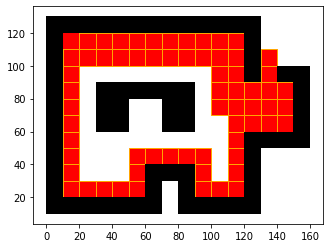

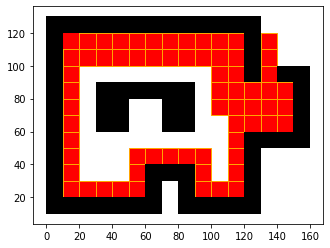

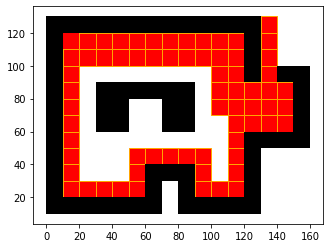

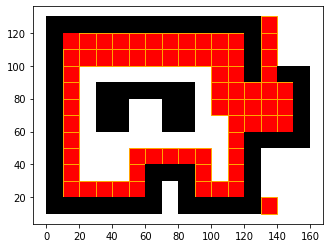

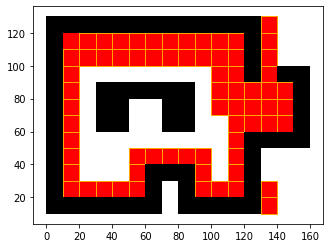

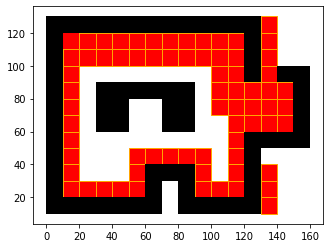

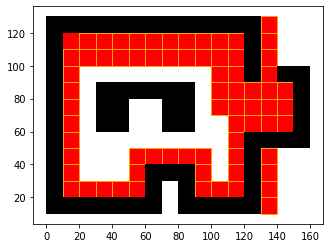

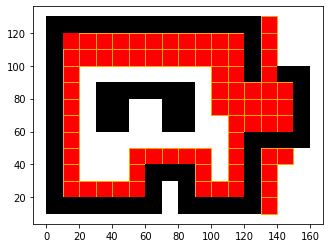

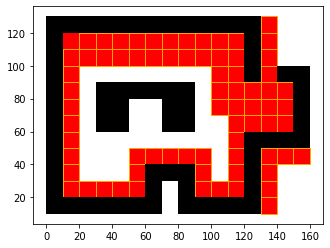

IndexError: ignored

In [ ]:
evita_obstaculos(mapa, mapa1, inix, iniy)
mapa = np.array(mapa2)